# Importing Libraries

In [1]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import convolution as con
import random
from keras.layers import Conv2D, Input, Dense, MaxPool2D, Flatten
from keras.models import Model

Using TensorFlow backend.


# Importing Images

In [2]:
x=list()
y=list()
pos=glob.glob("Concrete/Positive/*")
neg=glob.glob("Concrete/Negative/*")
for i in range(20000):
    img=cv2.imread(pos[i],0)
    img=cv2.resize(img,(128,128))
    img=img.reshape(128,128,1)
    x.append(img)
    y.append([1,0])
    img=cv2.imread(neg[i],0)
    img=cv2.resize(img,(128,128))
    img=img.reshape(128,128,1)
    x.append(img)
    y.append([0,1])
    print("Image number : %d"%(i+1),end='\r')
print("\nDone")
x=np.asarray(x)
x=np.float32(x)
x/=255
y=np.asarray(y)
y=np.uint8(y)
np.save('x.npy',x)
np.save('y.npy',y)
del(pos)
del(neg)
del(img)

Image number : 19999Image number : 20000
Done


In [3]:
x=np.load('x.npy')
y=np.load('y.npy')

# Processing the image

In [4]:
def converter(img):
    kernel1=np.asarray([[1,0,-1],[1,0,-1],[1,0,-1]])
    kernel2=np.asarray([[1,1,1],[0,0,0],[-1,-1,-1]])
    img=img.reshape((128,128))
    imgedge=np.sqrt(con.convolution(img,kernel1)**2+con.convolution(img,kernel2)**2)
    imgedge=imgedge.reshape((128,128,1))
    return imgedge

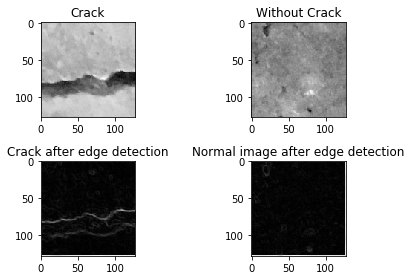

In [5]:
pos=random.randint(0,10000)*2
neg=random.randint(0,10000)*2+1
posedge=converter(x[pos])
negedge=converter(x[neg])

posedge=posedge.reshape((128,128))
negedge=negedge.reshape((128,128))

ax3=plt.subplot(2,2,1)
ax3.imshow(x[pos].reshape((128,128)),cmap='gray')
ax3.set_title('Crack')

ax4=plt.subplot(2,2,2)
ax4.imshow(x[neg].reshape((128,128)),cmap='gray')
ax4.set_title('Without Crack')

ax1=plt.subplot(2,2,3)
ax1.imshow(posedge,cmap='gray')
ax1.set_title('Crack after edge detection')

ax2=plt.subplot(2,2,4)
ax2.imshow(negedge,cmap='gray')
ax2.set_title('Normal image after edge detection')

plt.tight_layout()
plt.show()

In [6]:
x_edge=x.copy()
for i in range(x.shape[0]):
    x_edge[i,:,:,:]=converter(x_edge[i,:,:,:])
    print("Image number : %d"%(i+1),end='\r')
np.save('x_edge.npy',x_edge)
print('\nDone')

Image number : 40000
Done


In [7]:
x_edge=np.load('x_edge.npy')